<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目概要" data-toc-modified-id="项目概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>项目概要</a></span><ul class="toc-item"><li><span><a href="#项目背景" data-toc-modified-id="项目背景-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>项目背景</a></span></li><li><span><a href="#项目目标" data-toc-modified-id="项目目标-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>项目目标</a></span></li><li><span><a href="#数据源" data-toc-modified-id="数据源-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>数据源</a></span></li><li><span><a href="#程序源" data-toc-modified-id="程序源-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>程序源</a></span></li></ul></li><li><span><a href="#数据集探索" data-toc-modified-id="数据集探索-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据集探索</a></span><ul class="toc-item"><li><span><a href="#项目的目标" data-toc-modified-id="项目的目标-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>项目的目标</a></span></li><li><span><a href="#数据集背景信息" data-toc-modified-id="数据集背景信息-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据集背景信息</a></span></li><li><span><a href="#发现和处理异常值" data-toc-modified-id="发现和处理异常值-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>发现和处理异常值</a></span></li></ul></li><li><span><a href="#特征工程" data-toc-modified-id="特征工程-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征工程</a></span><ul class="toc-item"><li><span><a href="#去除特征" data-toc-modified-id="去除特征-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>去除特征</a></span></li><li><span><a href="#创建特征" data-toc-modified-id="创建特征-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>创建特征</a></span></li><li><span><a href="#特征缩放" data-toc-modified-id="特征缩放-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>特征缩放</a></span></li></ul></li><li><span><a href="#算法选择" data-toc-modified-id="算法选择-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>算法选择</a></span></li><li><span><a href="#调整参数" data-toc-modified-id="调整参数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>调整参数</a></span></li><li><span><a href="#进一步探索" data-toc-modified-id="进一步探索-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>进一步探索</a></span></li><li><span><a href="#验证" data-toc-modified-id="验证-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>验证</a></span></li><li><span><a href="#评估" data-toc-modified-id="评估-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>评估</a></span></li><li><span><a href="#总结与讨论" data-toc-modified-id="总结与讨论-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>总结与讨论</a></span></li><li><span><a href="#参考" data-toc-modified-id="参考-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>参考</a></span></li></ul></div>

## 项目概要
--- 

### 项目背景
安然曾是 2000 年美国最大的公司之一。2002 年，由于其存在大量的企业欺诈行为，这个昔日的大集团土崩瓦解。 在随后联邦进行的调查过程中，大量有代表性的保密信息进入了公众的视线，包括成千上万涉及高管的邮件和详细的财务数据。 

### 项目目标
根据公开的安然财务和电子邮件数据集，构建算法，找出有欺诈嫌疑的安然员工(POI)——这是一个练习，让学习到的机器学习技巧付诸实践。

### 数据源
- 原始数据：https://www.cs.cmu.edu/~./enron/
- 邮件数据：https://github.com/udacity/ud120-projects/tree/master/final_project/emails_by_address
- 财务数据：http://news.findlaw.com/hdocs/docs/enron/enron61702insiderpay.pdf  

邮件数据和财务数据均由 Uda 的导师 Katie 整理出，最终在整合了成了 final_project_dataset.pkl 。

### 程序源
- udacity machine learning 课程代码源: https://github.com/udacity/ud120-projects/tree/master/final_project

## 数据集探索
---
>向我们总结此项目的目标以及机器学习对于实现此目标有何帮助。作为答案的部分，提供一些数据集背景信息以及这些信息如何用于回答项目问题。你在获得数据时它们是否包含任何异常值，你是如何进行处理的？【相关标准项：“数据探索”，“异常值调查”】

### 项目的目标
根据公开的安然财务和电子邮件数据集，构建算法，预测某位安然员工是否是有欺诈嫌疑，即预测其是否为POI。  
机器学习可以帮助发现欺诈特征与欺诈标签的关系，找到与欺诈关系比较大的特征，选择准确率更高的算法参数来实现此目标。

### 数据集背景信息

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit

# data wrangle
from findOutliers import findOutlier_NaN, findOutlier_visual
from feature_creation import CreatePoiEmailRatio

# cross validation
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from feature_selecting import Select_K_Best

# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import nearest_centroid
from sklearn.svm import SVC

# evaluation
from tester import dump_classifier_and_data
from tester_2 import test_classifier
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score, f1_score

d:\program files\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
print 'Number of person:', len(data_dict)
print 'Number of features:', len(data_dict.values()[0])
print 'Number of POIs:', sum(map(lambda x: x['poi']==True, data_dict.values()))
print 'Number of non-POIs:', sum(map(lambda x: x['poi']==False, data_dict.values()))

Number of person: 146
Number of features: 21
Number of POIs: 18
Number of non-POIs: 128


- 原始数据有146位员工的信息，每位员工有21个特征。
- 其中嫌疑人有18位，非嫌疑人有128位。

### 发现和处理异常值
统计每位员工信息中的特征值为'NaN'比率

In [3]:
data_NaN = findOutlier_NaN(data_dict, 0)
data_NaN = sorted(zip(data_NaN.keys(), data_NaN.values()), key=lambda x: x[1], reverse=True)
data_NaN[:10]

[('LOCKHART EUGENE E', 0.9523809523809523),
 ('WHALEY DAVID A', 0.8571428571428571),
 ('WROBEL BRUCE', 0.8571428571428571),
 ('THE TRAVEL AGENCY IN THE PARK', 0.8571428571428571),
 ('GRAMM WENDY L', 0.8571428571428571),
 ('WODRASKA JOHN', 0.8095238095238095),
 ('CLINE KENNETH W', 0.8095238095238095),
 ('WAKEHAM JOHN', 0.8095238095238095),
 ('GILLIS JOHN', 0.8095238095238095),
 ('SCRIMSHAW MATTHEW', 0.8095238095238095)]

- 员工'LOCKHART EUGENE E'约95.24%的特征都是NaN，对预测POI意义不大，需要移除。
- 员工'THE TRAVEL AGENCY IN THE PARK'不是安然公司的员工，对预测POI意义不大，需要移除。

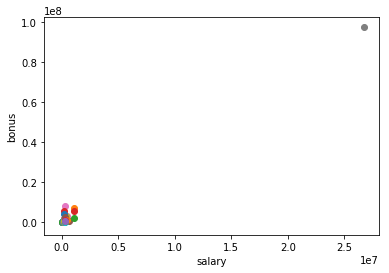

'TOTAL'

In [4]:
findOutlier_visual(data_dict)

发现员工'TOTAL'的bonus, salary存在异常情况，应该是错误的数据录入，其包含了数据集中所有财务信息的总和，将其删除。

In [5]:
data_dict.pop('LOCKHART EUGENE E') # No data available on this person.
data_dict.pop('THE TRAVEL AGENCY IN THE PARK') # Not a person/employee associated with Enron
data_dict.pop('TOTAL') # Summation of everyone's data

print 'Number of person:', len(data_dict)
print 'Number of features:', len(data_dict.values()[0])
print 'Number of POIs:', sum(map(lambda x: x['poi']==True, data_dict.values()))
print 'Number of non-POIs:', sum(map(lambda x: x['poi']==False, data_dict.values()))

Number of person: 143
Number of features: 21
Number of POIs: 18
Number of non-POIs: 125


移除异常之后剩下143位员工信息，非嫌疑人有125人。

## 特征工程

---

> 你最终在你的 POI 标识符中使用了什么特征，你使用了什么筛选过程来挑选它们？你是否需要进行任何缩放？为什么？作为任务的一部分，你应该尝试设计自己的特征，而非使用数据集中现成的——解释你尝试创建的特征及其基本原理。（你不一定要在最后的分析中使用它，而只设计并测试它）。在你的特征选择步骤，如果你使用了算法（如决策树），请也给出所使用特征的特征重要性；如果你使用了自动特征选择函数（如 SelectBest），请报告特征得分及你所选的参数值的原因。【相关标准项：“创建新特征”、“适当缩放特征”、“智能选择功能”】

安然邮件和财务数据与字典结合在一起，数据中的特征分为三大类，即财务特征、邮件特征和 POI 标签。  
财务特征: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (单位均是美元）

邮件特征: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (单位通常是电子邮件的数量，明显的例外是 ‘email_address’，这是一个字符串）

POI 标签: [‘poi’] (boolean，整数)

### 去除特征
根据观察，特征'email_address','other'均对预测嫌疑人意义不大，先去除这两个特征。  
所以取剩余特征为初始特征features_list，并用自动特征选择函数SelectKBest计算每个特征得分并排序。

In [6]:
features_list = ['poi',
                 'salary',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'from_this_person_to_poi',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person']

In [7]:
k_best_features = Select_K_Best(data_dict, features_list, len(features_list)-1)
k_best_features

[('exercised_stock_options', 24.815079733218194),
 ('total_stock_value', 24.182898678566879),
 ('bonus', 20.792252047181535),
 ('salary', 18.289684043404513),
 ('deferred_income', 11.458476579280369),
 ('long_term_incentive', 9.9221860131898225),
 ('restricted_stock', 9.2128106219771002),
 ('total_payments', 8.7727777300916792),
 ('shared_receipt_with_poi', 8.589420731682381),
 ('loan_advances', 7.1840556582887247),
 ('expenses', 6.0941733106389453),
 ('from_poi_to_this_person', 5.2434497133749582),
 ('from_this_person_to_poi', 2.3826121082276739),
 ('director_fees', 2.1263278020077054),
 ('to_messages', 1.6463411294420076),
 ('deferral_payments', 0.22461127473600989),
 ('from_messages', 0.16970094762175533),
 ('restricted_stock_deferred', 0.065499652909942141)]

特征得分最高的是'exercised_stock_options'，且得分高的大部分是财务特征，邮件特征最高分'shared_receipt_with_poi'排第九。  
### 创建特征
根据经验判断，与POI的邮件互动频率越大，该员工的欺诈嫌疑也越大。所以为邮件特征创建新特征来表示与POI的邮件互动频率：
1. from_poi_ratio = 收到来自POI的邮件数 / 总收到的邮件数
2. to_poi_ratio = 发送给POI的邮件数 / 总发送的邮件数
3. shared_with_poi_ratio = 来自POI分享的邮件数 / (总收到的邮件数 + 来自POI分享的邮件数)
4. poi_email_ratio = from_poi_ratio + to_poi_ratio + shared_with_poi_ratio

In [8]:
CreatePoiEmailRatio(data_dict, features_list)
k_best_features = Select_K_Best(data_dict, features_list, len(features_list)-1)
k_best_features

[('exercised_stock_options', 24.815079733218194),
 ('total_stock_value', 24.182898678566879),
 ('bonus', 20.792252047181535),
 ('salary', 18.289684043404513),
 ('from_poi_ratio', 14.812276057831314),
 ('deferred_income', 11.458476579280369),
 ('poi_email_ratio', 10.905442097981846),
 ('long_term_incentive', 9.9221860131898225),
 ('restricted_stock', 9.2128106219771002),
 ('total_payments', 8.7727777300916792),
 ('shared_receipt_with_poi', 8.589420731682381),
 ('loan_advances', 7.1840556582887247),
 ('shared_with_poi_ratio', 6.2765918624330661),
 ('expenses', 6.0941733106389453),
 ('from_poi_to_this_person', 5.2434497133749582),
 ('to_poi_ratio', 3.9694065694740988),
 ('from_this_person_to_poi', 2.3826121082276739),
 ('director_fees', 2.1263278020077054),
 ('to_messages', 1.6463411294420076),
 ('deferral_payments', 0.22461127473600989),
 ('from_messages', 0.16970094762175533),
 ('restricted_stock_deferred', 0.065499652909942141)]

新创建的4个特征得分分别是：
- from_poi_ratio： 14.812276057831314
- poi_email_ratio： 14.101271832938595
- shared_with_poi_ratio： 6.2765918624330661
- to_poi_ratio： 3.9694065694740988  

from_poi_ratio，poi_email_ratio的得分比较高，可以投入到算法模型的训练中。

最后选择特征值排名前10进行训练。

In [9]:
features_list = k_best_features[:11]

### 特征缩放
之后训练的算法有KNN和SVC，因为需要计算点与点之间的距离，不同的特征度量标准对它们影响很大，所以在之后的算法训练中相应的对KNN和SVC进行MinMaxScaler缩放。

## 算法选择
---
> 你最终使用了什么算法？你还尝试了其他什么算法？不同算法之间的模型性能有何差异？【相关标准项：“选择算法”】

尝试了6种有监督的分类算法，其中由于数据集中的 POI 和非 POI 的分布非常不均衡，所以设置 class_weight = balanced 来达到样本均衡。  
先使用默认的参数，通过tester.py中的test_classifier函数计算对比结果：

|Model|Accuracy|Precision|Recall|F1|F2|
|------|----------|---------|------|---|---|
|GaussianNB|0.841|0.3836|0.317|0.3471|0.3283|
|DecisionTreeClassifier|0.8057|0.2532|0.2345|0.2435|0.2380|
|NearestCentroid|0.7409|0.2850|0.6255|0.3916|0.5049|
|SVC|0.7268|0.2731|0.6315|0.3813|0.5002|
|RandomForestClassifier|0.8567|0.3279|0.071|0.1167|0.0842|
|AdaBoostClassifier|0.8042|0.2422|0.22|0.2305|0.2241|

发现NearestCentroid和SVC训练的f1分数比较高，说明它们的预测结果比其他算法更好。

## 调整参数
---
> 调整算法的参数是什么意思，如果你不这样做会发生什么？你是如何调整特定算法的参数的？（一些算法没有需要调整的参数 – 如果你选择的算法是这种情况，指明并简要解释对于你最终未选择的模型或需要参数调整的不同模型，例如决策树分类器，你会怎么做）。【相关标准项：“调整算法”】

调整算法的参数是指给训练集找到最优参数集合的过程，如果不这样做，算法得不到最优化，预测也得不到最好的效果。  
调整参数的方法有很多种，主要有手动调优、网格搜索、随机搜索以及基于贝叶斯的参数调优方法，这里我选择用网格搜索GridSerarchCV的方法，以F1的标准，去寻找最优参数。  
调参后的最优算法对比结果：

|Model|Accuracy|Precision|Recall|F1|F2|
|------|----------|---------|------|---|---|
|GaussianNB|0.841|0.3836|0.317|0.3471|0.3283|
|DecisionTreeClassifier|0.6688|0.1949|0.4740|0.2762|0.3688|
|NearestCentroid|0.7409|0.2850|0.6255|0.3916|0.5049|
|SVC|0.7139|0.2700|0.673|0.3854|0.5183|
|RandomForestClassifier|0.7842|0.2675|0.356|0.3055|0.3339|
|AdaBoostClassifier|0.8045|0.2495|0.232|0.2404|0.2352|

调参后的算法的F1得分都得到了提高，付出的代价是准确率均有不同程度的下降，这是因为网格搜索方法是以寻求最优F1的目标去优化参数。

## 进一步探索
---
尝试缩减特征的数量为2个，分别选取自动特征选择函数中财务特征和邮件特征得分最高的exercised_stock_options和from_poi_ratio，用同样的算法模型和参数，得到的相应结果：

|Model|Accuracy|Precision|Recall|F1|F2|
|------|----------|---------|------|---|---|
|GaussianNB|0.8449|0.5720|0.276|0.3723|0.3079|
|DecisionTreeClassifier|0.6813|0.5285|0.4740|0.3560|0.4427|
|NearestCentroid|0.7338|0.3426|0.6505|0.4489|0.5514|
|SVC|0.7139|0.2700|0.673|0.3854|0.5183|
|RandomForestClassifier|0.7220|0.2803|0.426|0.3382|0.3859|
|AdaBoostClassifier|0.7738|0.2727|0.2145|0.2401|0.2241|

尝试把邮件特征poi_email_ratio代替from_poi_ratio，因为from_poi_ratio综合了发送、收到POI邮件和与POI分享的邮件信息，更全面地代表邮件特征，同样的方法，得到的结果如下：

|Model|Accuracy|Precision|Recall|F1|F2|
|------|----------|---------|------|---|---|
|GaussianNB|0.6837|0.3142|0.759|0.4443|0.5915|
|DecisionTreeClassifier|0.6495|0.2494|0.549|0.3430|0.4427|
|NearestCentroid|0.6836|0.3142|0.759|0.4448|0.5914|
|SVC|0.6627|0.2700|0.673|0.3854|0.5183|
|RandomForestClassifier|0.7842|0.2983|0.76|0.4285|0.5804|
|AdaBoostClassifier|0.7798|0.3014|0.2435|0.2694|0.2532|

得到更高分的F1，所以特征选用exercised_stock_options和poi_email_ratio，算法选用NearestCentroid建立模型。

## 验证
---
> 什么是验证，未正确执行情况下的典型错误是什么？你是如何验证你的分析的？【相关标准项：“验证策略”】

- 验证是对训练得到的模型进行验证，需要把数据集分为训练集和测试集，先在训练集上拟合训练得到模型，在把测试集数据放到模型里检验模型的准确性。如果没有正确执行，会得到的典型错误是过拟合。因为一个仅给出测试用例标签的模型将会获得极高的分数，但对于尚未出现过的数据它则无法预测出任何有用的信息。
- 因为数据集中的 POI 和非 POI 的分布非常不均衡，很有可能随机抽样得到的训练集几乎没有POI。所以用StratifiedShuffleSplit验证方法，它实现的分层抽样方法，确保相对的类别频率在每个训练和验证 折叠中大致保留。

## 评估
---
> 给出至少 2 个评估度量并说明每个的平均性能。解释对用简单的语言表明算法性能的度量的解读。【相关标准项：“评估度量的使用”】

通常分类模型的评估方法是准确率，即模型预测正确的比例。但准确率的缺陷在于无法准确反映出现偏斜类问题的数据，这个项目的数据集就出现了偏斜的问题了。换句话说，因为数据集中的标签大部分是非POI，一个只预测员工是非POI的简单模型也可以有很高的准确率，所以准确率的高低对于评价模型的好坏意义不大。

这种情况下，需要更全面地评估模型的好坏，因此选用了精度Precision, 召回率Recall 和 F1 来评估每个模型的平均性能。
- Precision： 正确预测是POI的次数 / 预测是POI的次数。即Precison越高，则预测是POI的正确率越高。
- Recall： 正确预测是POI的次数 / 数据集中POI的个数。即Recall越高，则预测出POI的机会越大。
- F1： Precision和Recall的加权调和平均，F1得分越高，模型的预测能力越高。即如果预测某位员工是POI，那预测正确率越高，同时如果预测某位员工不是POI，真是不是POI的正确率也越高。

## 总结与讨论
---

In [10]:
! python tester.py

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('nearestcentroid', NearestCentroid(metric='euclidean', shrink_threshold=None))])
	Accuracy: 0.68367	Precision: 0.31416	Recall: 0.75900	F1: 0.44438	F2: 0.59149
	Total predictions: 12000	True positives: 1518	False positives: 3314	False negatives:  482	True negatives: 6686



D:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


使用了机器学习课程所学的知识，完成了数据集探索、特征工程、选择算法、调整参数、验证和评估的过程。但整个过程中仍有很多地方需要改进，总结一下几点：
- 特征的创建与选择。创建特征是根据经验去创建，存在很大的主观因素，通过思考不同特征对于欺诈的影响，可以尝试能找到更代表欺诈特征的特征值。
- 特征缩放。我用了MinMaxScaler的方法去做特征缩放，但对于样本分布非常不均数据集，可以通过其他的缩放方法(对数log或其他方法)，让特征值的度量最大化地归一，这样也会提高模型效果。
- 增加数据信息。通过加入项目中另一个领域的数据集邮件的文本信息，进行文本分析，可以得到更多关于POI的信息和特征值，更全面地学习欺诈特征与欺诈标签的关系，可以提高模型的预测效果。

## 参考
---
- [sklearn中文手册](http://sklearn.apachecn.org/cn/0.19.0/index.html)
- https://github.com/supernova16/DAND-P5-Machine-Learning
- https://github.com/nehal96/Machine-Learning-Enron-Fraud